In [1]:
import pyaerocom as pya

In [2]:
pya.const.BASEDIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

Initiating directories for pyaerocom test dataset


In [3]:
read_factory = pya.io.ReadUngridded('EBASMC')

In [4]:
reader = read_factory.get_reader()
reader

In [5]:
print(reader.PROVIDES_VARIABLES)

['DEFAULT', 'scatc550aer', 'scatc440aer', 'scatc700aer', 'scatc550dryaer', 'scatc440dryaer', 'scatc700dryaer', 'ang4470dryaer', 'scatc550lt1aer', 'bscatc550aer', 'absc550aer', 'absc550dryaer', 'absc550lt1aer', 'bscatc550dryaer', 'scatcrh', 'abscrh', 'concso4', 'concso2', 'concpm10', 'concpm25', 'concso4t', 'concso4c', 'concbc', 'conceqbc', 'conctc', 'concoa', 'concoc', 'concss', 'concnh3', 'concno3', 'concnh4', 'conchno3', 'conctno3', 'concno2', 'conco3', 'concco', 'concprcpso4', 'concprcpso4t', 'concprcpso4c', 'concprcpno3', 'concprcpso4scavenging', 'concprcpnh4', 'wetso4', 'wetconcso4', 'wetso4t', 'wetso4c', 'wetoxn', 'wetrdn', 'wetnh4', 'precip', 'wetconcph', 'wetno3', 'scavratioso4', 'test']


In [6]:
pya.get_variable('scatc550dryaer')

scatc550dryaer
standard_name: None; Unit: 1/Mm

In [7]:
data = reader.read(vars_to_retrieve='scatc550dryaer', station_names='B*')

Retrieving EBAS files for variables
['scatc550dryaer']
Reading files 1-13 of 129 (ReadEbas) | 00:01:10 (delta = 0 s')
Reading files 13-25 of 129 (ReadEbas) | 00:01:12 (delta = 1 s')
Reading files 25-37 of 129 (ReadEbas) | 00:01:14 (delta = 1 s')
Reading files 37-49 of 129 (ReadEbas) | 00:01:16 (delta = 2 s')
Reading files 49-61 of 129 (ReadEbas) | 00:01:18 (delta = 1 s')
Reading files 61-73 of 129 (ReadEbas) | 00:01:19 (delta = 1 s')
Reading files 73-85 of 129 (ReadEbas) | 00:01:21 (delta = 1 s')
Reading files 85-97 of 129 (ReadEbas) | 00:01:22 (delta = 1 s')
Reading files 97-109 of 129 (ReadEbas) | 00:01:23 (delta = 1 s')
Reading files 109-121 of 129 (ReadEbas) | 00:01:25 (delta = 1 s')
Reading files 121-133 of 129 (ReadEbas) | 00:01:29 (delta = 4 s')


In [14]:
data.unique_station_names

['BEO Moussala',
 'Barrow',
 'Big Bend National Park-K-Bar (TX04)',
 'Birkenes II',
 'Bliss SP (TRPA)',
 'Bondville',
 'Boundary Waters Canoe Area',
 'Brigantine NWR']

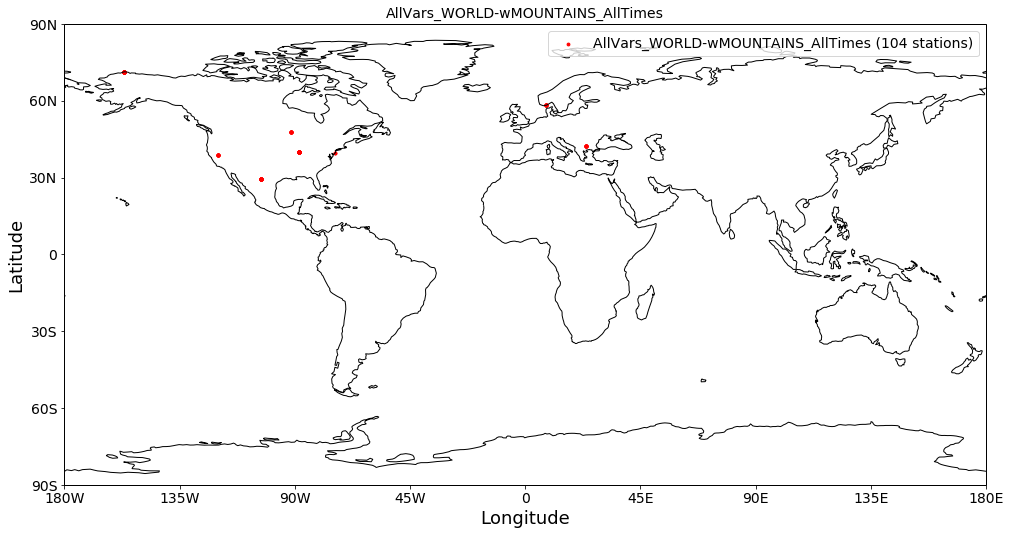

In [10]:
data.plot_station_coordinates();

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


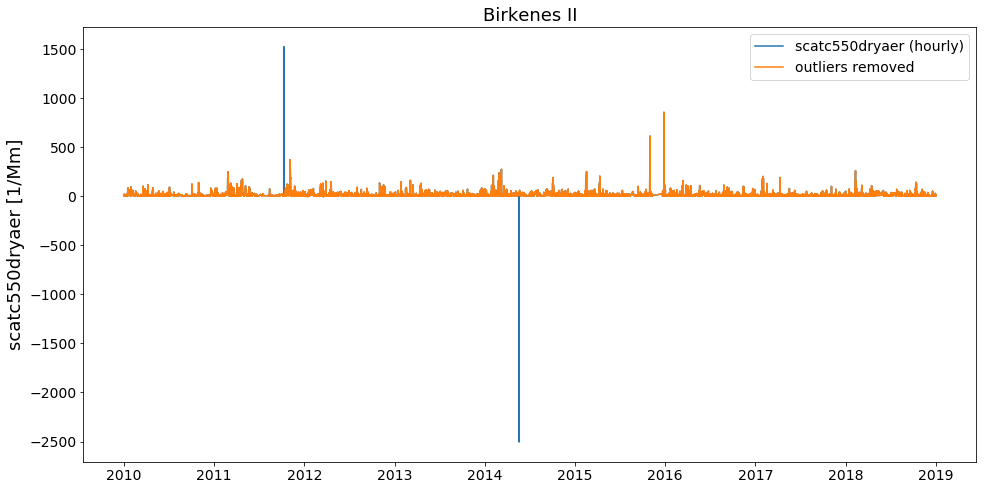

In [11]:
stat = data.to_station_data('Birkenes II')
ax = stat.plot_timeseries(var_name='scatc550dryaer')
stat.remove_outliers(var_name='scatc550dryaer')
stat.plot_timeseries(var_name='scatc550dryaer', label='outliers removed', ax=ax);

In [12]:
stat.revision_date

[numpy.datetime64('2019-06-12T00:00:00'),
 numpy.datetime64('2019-05-27T00:00:00'),
 numpy.datetime64('2015-03-09T00:00:00')]

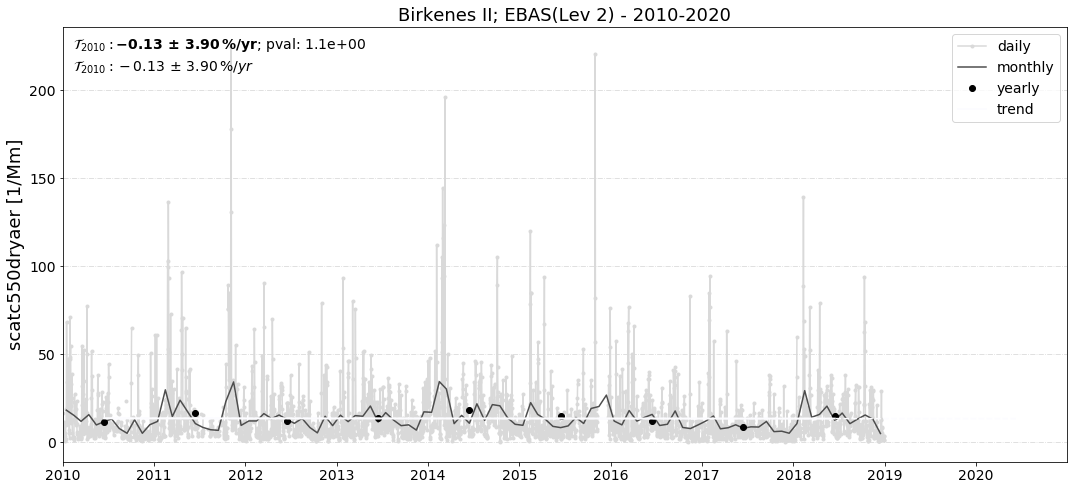

In [15]:
stat.compute_trend('scatc550dryaer', 2010, 2020)
stat.trends['scatc550dryaer'].plot(period='2010-2020');

**NOTE**: the plotted trend line appears white since the trend is close to 0 (cf. notebook `example_aas_etal_read` for a case with a strong positive trend)